# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
food = pd.read_csv('food_claims_2212.csv')
food.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [67]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [68]:
# Replace missing values (36) with the overall median claim amount/ column 'amount_paid'
overall_median = food['amount_paid'].median()
food['amount_paid'].fillna(overall_median, inplace=True)
missing_count_amount_paid  = food['amount_paid'].isnull().sum()
missing_count_amount_paid

0

In [69]:
# Replace missing values (26) with FALSE / column 'linked_cases'
food['linked_cases'].fillna(False, inplace=True)
missing_count_linked_cases  = food['linked_cases'].isnull().sum()
missing_count_linked_cases

0

In [70]:
food['claim_id'].duplicated().sum()

0

## Task 1

There are 2000 entries, 0 to 1999
Data columns (total 8 columns)
The values of every column match the description given in the table
The column that have missing values are:
'amount_paid' = 36, Replace with the overall median claim amount 
'linked_cases' = 26, Replace with FALSE

2) Create a visualization that shows the number of claims in each location. Use the visualization to:
a. State which category of the variable location has the most observations
b. Explain whether the observations are balanced across categories of the
variable location

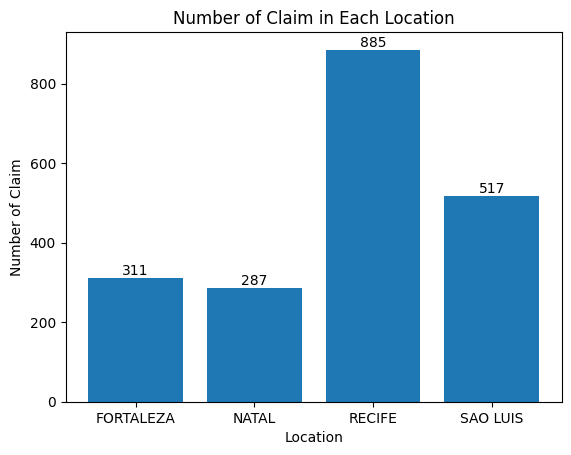

In [71]:

# Group the data by location and count the number of claims
claim_by_location = food.groupby('location')['claim_id'].count()

# Create a bar plot
plt.bar(claim_by_location.index, claim_by_location.values)
plt.xlabel('Location')
plt.ylabel('Number of Claim')
plt.title('Number of Claim in Each Location')
# Add the number values to the bars
for i, v in enumerate(claim_by_location.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## Task 2

Conclusion: "RECIFE" has the highest number of claims, followed by "SAO LUIS", "FORTALEZA", and "NATAL".
There is a significant difference in counts across categories, the observations may be unbalanced, indicates that the distribution of claims is not evenly distributed across all locations.

3) Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

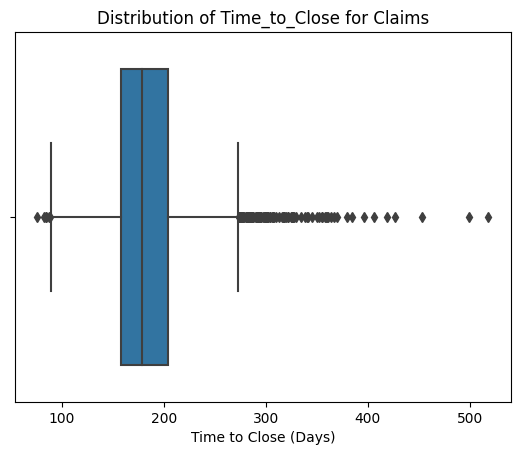

179.0 76 518


In [72]:
# Calculate the statistics
median = food['time_to_close'].median()
minimum = food['time_to_close'].min()
maximum = food['time_to_close'].max()

# Creating a box plot of time to close
sns.boxplot(x=food['time_to_close'])

# Adding labels and title to the plot
plt.xlabel('Time to Close (Days)')
plt.title('Distribution of Time_to_Close for Claims')

# Displaying the plot
plt.show()
print(median, minimum, maximum)

## Task 3

conclusion: The median days is located at 179 days. This means that 50% of the claims take less than 179 days to close, while the other 50% take longer. The minimum value is 76 days, indicating the shortest time it takes to close a claim. The maximum value is 518 days, representing the longest time it takes to close a claim. By considering the positioning of the median and observing the range of values, we can infer that the distribution of time to close claims is slightly right-skewed, with a concentration of values towards longer durations.

4) Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

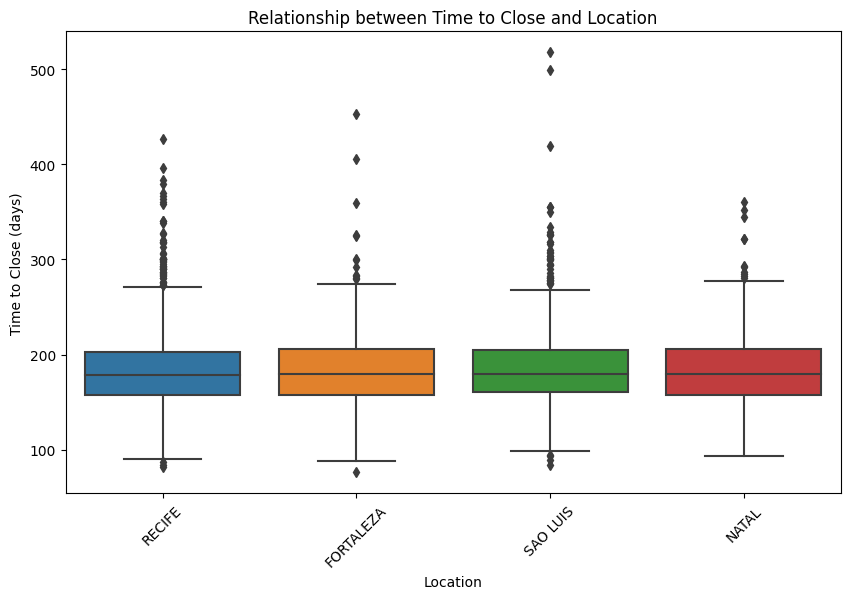

Median for each: location
FORTALEZA    180.0
NATAL        179.0
RECIFE       178.0
SAO LUIS     179.0
Name: time_to_close, dtype: float64
Maximum for each: location
FORTALEZA    453
NATAL        361
RECIFE       427
SAO LUIS     518
Name: time_to_close, dtype: int64
Minimum for each: location
FORTALEZA    76
NATAL        93
RECIFE       82
SAO LUIS     84
Name: time_to_close, dtype: int64


In [73]:
food.groupby('location')['time_to_close'].median()
food.groupby('location')['time_to_close'].max()
food.groupby('location')['time_to_close'].min()
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=food['location'], y=food['time_to_close'])

# Set the labels and title
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.title('Relationship between Time to Close and Location')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
print(f"Median for each: {food.groupby('location')['time_to_close'].median()}")
print(f"Maximum for each: {food.groupby('location')['time_to_close'].max()}")
print(f"Minimum for each: {food.groupby('location')['time_to_close'].min()}")

## Task 4

conclusion: There is a relatively similar median time to close across the different locations. The median values for FORTALEZA, NATAL, and SAO LUIS are all around 179-180 days, while RECIFE has a slightly lower median of 178.0 days. However, there is variation in the maximum and minimum time to close, indicating that some claims in each location take longer or shorter periods to be closed.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam